# Clustering Jerárquico - Covid 2020

## Librerías y Carga del Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

## Objetivo

El objetivo de este análisis jerárquico es entender el dataset de muertes por covid en 2020 en relación al ratio de mortalidad del covid con el PIB de cada país y detectar si el tipo de sanidad (pública o privada) se ve reflejado en esta clasificación. Para ello se verá si existe alguna agrupación entre países con características similares.

## Visualización y preprocesamiento de los datos

### Visualización

En primer lugar, mostramos las 5 primeras filas del dataframe covid para visualizar y entender mejor los datos.

- Contamos con 5 columnas, una correspondiente al ID, otra especificando el país en concreto, otra con las muertes totales en 2020, otra con la población de dicho país y por último el PIB del país en cuestión. Realizaremos el clustering para 20 países distintos.

In [2]:
df = pd.read_csv('../data/final/covid_final.csv')
df_sanidad = pd.read_csv('../data/clean/sanidad.csv')
display(df.head(5))


,Unnamed: 0,Country,Covid_Deaths_2020,poblacion,pib
0,0,Argentina,43245,44044811,6.436287e+11
1,1,Brazil,194949,207833831,2.062831e+12
2,2,Brunei Darussalam,3,424473,1.212810e+10
3,3,Canada,15632,36543321,1.649878e+12
4,4,Colombia,43213,48909844,3.118837e+11


En segundo lugar, mostramos las 5 primeras filas del dataframe sanidad para visualizar y entender mejor los datos.

- Contamos con 2 columnas, una correspondiente al nombre del país y la otra correspondiente a si tiene sanidad pública (1) o privada (0).

### Integridad de los datos

In [3]:
display(df_sanidad.head(5))

,Country Name,Sanidad
0,Argentina,0
1,Brazil,0
2,Brunei Darussalam,1
3,Canada,1
4,Colombia,0


Vemos si hay datos nulos, o inconsistentes.

In [4]:
df.isna().sum()

Unnamed: 0           0
Country              0
Covid_Deaths_2020    0
poblacion            0
pib                  0
dtype: int64

In [5]:
df_sanidad.isna().sum()

Country Name    0
Sanidad         0
dtype: int64

### Eliminamos columnas innecesarias.

Eliminamos la columna del ID ya que no aporta ningún valor al estudio.

In [6]:
df = df.drop('Unnamed: 0', axis = 1)

### Creamos columnas necesarias

#### PIB per capita

Sustituimos la columna "PIB" por una columna pib_per_capita que representa el PIB per capita en relación a la población de un país.

In [7]:
df['pib'] = df['pib']/df['poblacion']
df = df.rename(columns={"pib": "pib_per_capita"})

#### Muertes por covid por 100.000 habitantes

Sustituimos las columnas "Covid_Deaths_2020" y "poblacion" por una columna covid_ratio_deaths que representa las muertes de ese país por 100.000 habitantes.

In [8]:
#Con un regla de tres obtenmos el ratio de muertes por 100.000 habitantes: x/100.000 = muertes_covid_2020/poblacion
df['covid_ratio_deaths'] = df['Covid_Deaths_2020']/df['poblacion']*100000
df = df.drop('Covid_Deaths_2020', axis = 1)
df = df.drop('poblacion', axis = 1)

### Extraemos los países.

Recogemos el país de cada fila en una categoría (la Y de toda la vida) para asignarsela más tarde. No sobreescribimos el dataframe anterior.

In [9]:
Y_paises = df['Country']
df_features = df.drop('Country', axis = 1)

### Normalizamos.

Normalizamos los datos para trabajar sobre el mismo espacio y darle el mismo valor a cada atributo.

In [10]:
df_numpy = df_features.values #devuelve un numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df_numpy_escalado = min_max_scaler.fit_transform(df_numpy)
df_normalized = pd.DataFrame(df_numpy_escalado, columns = ["pib_per_capita","covid_ratio_deaths"])

Visualizamos el formato final de los datos:

In [11]:
display(df_normalized.head(5))

,pib_per_capita,covid_ratio_deaths
0,0.211964,0.751282
1,0.132181,0.717562
2,0.449548,0.001462
3,0.731677,0.325074
4,0.071782,0.675654


## Selección del mejor linkage para la clusterización

Para hacer un buen clustering jerárquico, se debe de evaluar qué método de linkage se desea emplear, haciendo un estudio y comparando los distintos métodos.

Un filtro previo que se puede aplicar es el del coeficiente de Cophenet para los distintos linkages y elegir el mejor valor. Este coeficiente nos permite visualizar la correlación de los datos. Si el valor es cercano a 1, indica que la distancia entre objetos combinados por el claster es mínima y por tanto se trataría de una clusterización "perfecta". Cuanto más cercana a 0 el clustering generado será peor ya que los datos son muy dispersos en el sentido de que la distancia entre distintos puntos es la misma para todos los puntos del espacio de datos.

Podemos ver todos los métodos disponibles a continuación y escoger el que mejor coeficiente de Cophenet nos de.

In [12]:
#Single
Z = linkage(df_normalized, 'single')
c, coph_dists = cophenet(Z, pdist(df_normalized))
display("Single: " + str(c))

#Ward
Z = linkage(df_normalized, 'ward')
c, coph_dists = cophenet(Z, pdist(df_normalized))
display("Ward: " + str(c))

#Average
Z = linkage(df_normalized, 'average')
c, coph_dists = cophenet(Z, pdist(df_normalized))
display("Average: " + str(c))

#Complete
Z = linkage(df_normalized, 'complete')
c, coph_dists = cophenet(Z, pdist(df_normalized))
display("Complete: " + str(c))

#Weighted
Z = linkage(df_normalized, 'weighted')
c, coph_dists = cophenet(Z, pdist(df_normalized))
display("Weighted: " + str(c))

#Centroid
Z = linkage(df_normalized, 'centroid')
c, coph_dists = cophenet(Z, pdist(df_normalized))
display("Centroid: " + str(c))

#Median
Z = linkage(df_normalized, 'median')
c, coph_dists = cophenet(Z, pdist(df_normalized))
display("Median: " + str(c))

'Single: 0.8873640587739234'

'Ward: 0.8348422968534717'

'Average: 0.8932952813361329'

'Complete: 0.8739070547754889'

'Weighted: 0.8872900056725417'

'Centroid: 0.8910914631870668'

'Median: 0.8863350053472068'

Podemos observar que el mejor valor viene dado por el linkage "Average" con un valor de 0.89. Procederemos a usar este método de linkage para la clusterización.

## Creación del clustering jerárquico con el mejor linkage

Empleamos el linkage "Average" y generamos el clustering jerárquico.

In [13]:
#Average
#Guardamos el clustering en la variable Z.
Z = linkage(df_normalized, 'average')
c, coph_dists = cophenet(Z, pdist(df_normalized))
display("Average: " + str(c))

'Average: 0.8932952813361329'

## Elección del mejor k (clases generadas)

Para elegir el mejor k, miramos el error asociado a cada cluster, este error puede verse también en el dendograma representado en el apartado de representación gráfica de este entregable.

Cuando el error se estabilice, podremos elegir el número de clusters.

También debemos tener en cuenta, el interés del problema, ya que para la agrupación de países, quizás tener un número muy elevado no nos aporte mucho.

Nuestro objetivo es saber si el tipo de sanidad influye en relación al PIB y al ratio de muertes por covid por 100.000 habitantes, al existir solamente dos tipos de sanidad (pública o privada), quizás sea conveniente elegir un k=2 (independientemente del error) para ver si los países con un tipo de sanidad igual son agrupados dentro del mismo cluster.  

In [14]:
x = []     # X representa un vector donde se almacenan el número de clases correspondientes al error evaluado en Y.  
y = []     # Y representa un vector que almacena el error del clustering jerárquico, con linkage "Average" generado en el aprtado anterior. 

for i in range(19):
    y.append(Z[-(i+1)][2])
    x.append(i+1)

Visualizamos el error del clustering en relación al número de clases generadas.

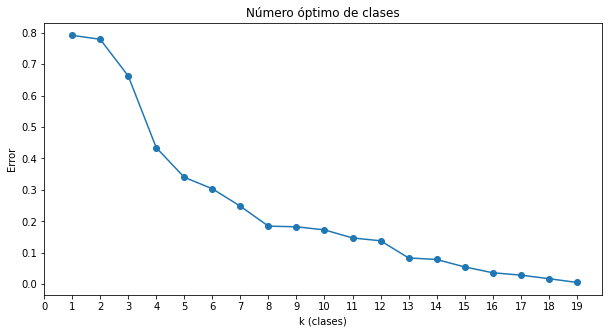

In [15]:
plt.subplots(figsize=(10, 5))
plt.title('Número óptimo de clases')
plt.xlabel('k (clases)')
plt.ylabel('Error')
plt.plot(x, y, '-o')
plt.xticks(np.arange(0, 20, step=1))
plt.show()

Podemos observar que el error se estabiliza a partir de 5 clases (Error = 0.34).

Esto nos da lugar a 5 clases diferenciadas, el objetivo sería mirar si en una clase predominan los países con sanidad de algún tipo y así poder clasificarlos. Sin embargo, si observamos el número de individuos por clase en el dendograma podemos ver que hay 3 clases con dos países o menos, lo cual nos da lugar a varias situaciones "peculiares" que deben ser estudiadas.

Hemos descartado coger únicamente 2 clases ya que el error era muy elevado y el número de países por clase no estaba bien distribuido. 

Escogeremos 5 clases para obtener los resultados y conclusiones.

## Representación gráfica

### Dendograma

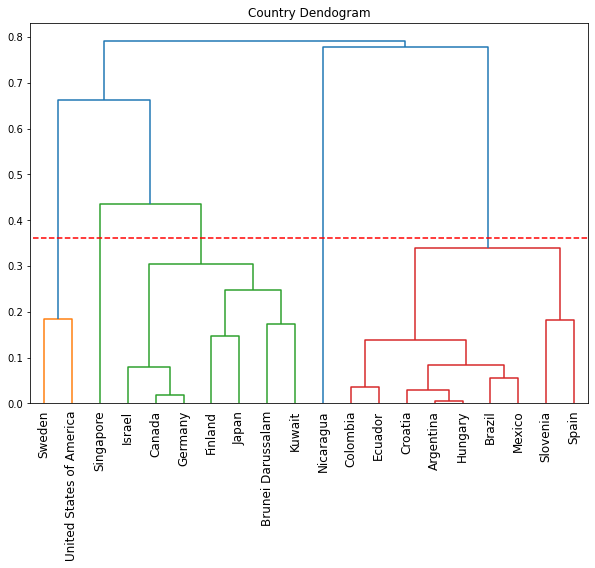

In [16]:
#Dibujo del dendograma de los 20 países.
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Country Dendogram")

#####horizontal line
xs = np.linspace(1,2100,20)
horiz_line_data = np.array([0.36 for i in range(len(xs))])
plt.plot(xs, horiz_line_data, 'r--') 

#Dendograma
dend = shc.dendrogram(shc.linkage(df_normalized, method='average'), labels = Y_paises.values, leaf_rotation = 90)

Las lineas verdes azules y rojas representan los distintos clusterings.

La linea roja discontinua representa el k óptimo que hemos escogido. 

Las clases se representan en las intersecciones de las lineas verticales con la línea horizontal roja discontinua, nombradas de izquierda a derecha con números ascendentes, empezando por el 1 y acabando en 5.

### Interpretación del dendograma

Podemos observar tres aspectos claves únicamente con la división y representación del dendograma:

- Nicaragua es muy diferente a todos los demás países, y es por eso por lo que el clustering lo agrupa como una clase separada. De la misma forma ocurre con Singapore y con Suecia y Estados Unidos.

- Las clases 3 y 5 se encuentran equilibradas en relación a la cantidad de países existentes en cada cluster.

- Haber elegido un k = 5 nos permite comparar entre las clases 3 y 5 y separar las clases 1,2 y 4 como casos particulares, habiendo sido una decisión acertada. 

## Análisis de las clases

Para llegara  nuestro objetivo, podemos comprobar el porcentaje de países de cada clase con sanidad pública vs privada.

Alternativamente, si calculamos la media entre todos los países de la misma clase, obtendremos los valores medios de PIB y ratio de muertes, obteniendo el país "promedio" que correspondería a dicha clase.

In [17]:
#Cálculo de clase promedio y asignación de cada clase.

#Guardamos los labels de cada país.
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
cluster.fit_predict(df_normalized)
labels = cluster.labels_

#Reasignamos el número de cada clase para que concuerde con el dendograma superior.
labels = np.where(labels==0, 5, labels)
labels = np.where(labels==1, 0, labels)
labels = np.where(labels==3, 1, labels)
labels = np.where(labels==0, 3, labels)
labels = np.where(labels==2, 0, labels)
labels = np.where(labels==4, 2, labels)
labels = np.where(labels==0, 4, labels)

#Creamos los países promedios
paisesPromedios = []

df_features.insert(0, 'Clase', labels)
df.insert(0, 'Clase', labels)

for i in range(1,6):
    #Esta sentencia hace la media de todos los países del tipo i, obteniendo el país "promedio", con los valores brutos (sin normalizar).
    paisesPromedios.append(df_features[df_features['Clase']==(i)].sum()/len(df_features[df_features['Clase']==(i)]))

#Lo convertimos a un dataframe y lo mostramos por pantalla.
paisesPromedios = pd.DataFrame(paisesPromedios)

Las clases corresponden a los siguientes países (para una mejor visualización):

In [18]:
#Las clases corresponden a los siguientes países (para una mejor visualización).
for cluster in range(1,6):
    country_names = df[df['Clase'] == cluster]['Country'].values
    
    print('Cluster ' + str(cluster))
    for country in country_names:
        print(' - ' + country)

Cluster 1
 - Sweden
 - United States of America
Cluster 2
 - Singapore
Cluster 3
 - Brunei Darussalam
 - Canada
 - Finland
 - Germany
 - Israel
 - Japan
 - Kuwait
Cluster 4
 - Nicaragua
Cluster 5
 - Argentina
 - Brazil
 - Colombia
 - Croatia
 - Ecuador
 - Hungary
 - Mexico
 - Slovenia
 - Spain


### Características de cada clase

Visualizamos el país promedio para cada clase:

In [19]:
paisesPromedios

,Clase,pib_per_capita,covid_ratio_deaths
0,1.0,56926.865522,96.577354
1,2.0,60913.745333,0.516727
2,3.0,39042.570262,22.618968
3,4.0,2159.157868,2.584240
4,5.0,14017.438913,99.652605


### Comparación con el tipo de sanidad

Podemos ver un resumen de a qué clase pertenece cada país, y qué tipo de sanidad posee (Pública (1) o privada (0)).

In [20]:
#Juntamos df con df_Sanidad
df['Sanidad'] = df_sanidad['Sanidad'].values
df['Country'] = Y_paises.values
df.head(20)

,Clase,Country,pib_per_capita,covid_ratio_deaths,Sanidad
0,5,Argentina,14613.041825,98.184097,0
1,5,Brazil,9925.386238,93.800417,0
2,3,Brunei Darussalam,28572.146778,0.706759,1
3,3,Canada,45148.552706,42.776627,1
4,5,Colombia,6376.706716,88.352357,0
5,5,Croatia,13451.624948,95.041109,0
6,5,Ecuador,6213.501276,83.608568,0
7,3,Finland,46336.663253,10.184789,1
8,3,Germany,44552.819372,40.880989,1
9,5,Hungary,14605.854345,97.435974,0


Podemos visualizar estos datos agrupados por clases, con la media del PIB per capita, del ratio de muertes por covid y además, una gráfica con el porcentaje de sanidad pública de cada país.

,Clase,pib_per_capita,covid_ratio_deaths,Porcentaje_Sanidad_Publica,Porcentaje_Sanidad_Privada,Num_Paises
0,1.0,56926.865522,96.577354,0.500000,0.500000,2
1,2.0,60913.745333,0.516727,1.000000,0.000000,1
2,3.0,39042.570262,22.618968,1.000000,0.000000,7
3,4.0,2159.157868,2.584240,0.000000,1.000000,1
4,5.0,14017.438913,99.652605,0.222222,0.777778,9


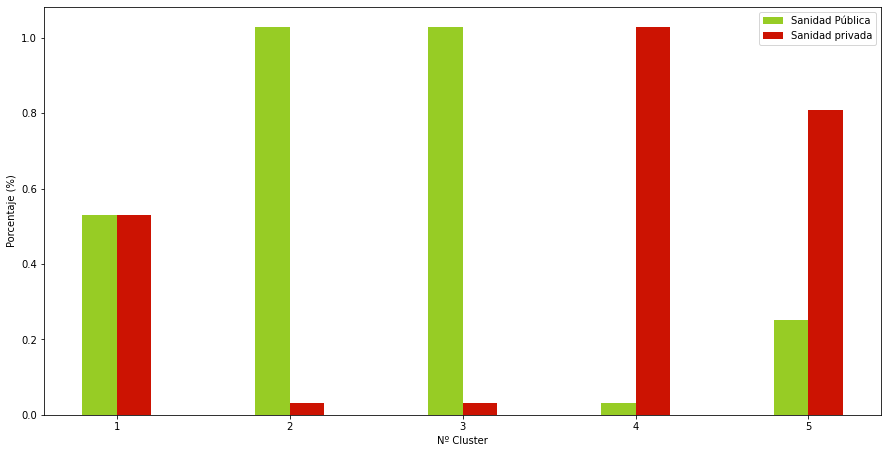

In [21]:
#Vemos que porcentaje de sanidad pública y privada pertenece a cada clase.
paisesPromedios['Porcentaje_Sanidad_Publica'] = df.groupby('Clase').mean()['Sanidad'].reset_index(drop=True)
paisesPromedios['Porcentaje_Sanidad_Privada'] = (1 - df.groupby('Clase').mean()['Sanidad']).reset_index(drop=True)
paisesPromedios['Num_Paises'] = df.groupby(['Clase']).size().reset_index(drop=True)
display(paisesPromedios)

#Plot para visualizar el tipo de sanidad Pública
plt.figure(figsize=(15, 7.5))
ax = plt.subplot(111)
ax.bar([0.9,1.9,2.9,3.9,4.9], paisesPromedios['Porcentaje_Sanidad_Publica']+0.03, width=0.2, color='#97cc25', align='center')
ax.bar([1.1,2.1,3.1,4.1,5.1], paisesPromedios['Porcentaje_Sanidad_Privada']+0.03, width=0.2, color='#cc1302', align='center')
plt.xlabel("Nº Cluster")
plt.ylabel("Porcentaje (%)")
plt.legend(["Sanidad Pública","Sanidad privada"])
plt.show()

### Análisis 

Tras observar todos estos datos, llegamos a las siguientes conclusiones con respecto a cada clase: 

- La clase 1 pertenece a los países de Estados Unidos y Suecia, esta agrupación viene dada ya que su PIB per cápita es muy elevado y de la misma forma sucede con las muertes por covid, siendo muy altos en ambos casos. Con respecto a la sanidad no se puede decir nada, ya que ambos países son fuertes potencias y cada uno posee un tipo de sanidad distinto.

- La clase 2 agrupa únicamente a Singapore, esto es debido a que su tasa de mortalidad por covid es incrieblemente baja, además de tener un PIB per cápita también elevado. Singapore es actualmente el lugar con menor tasa de mortalidad por contagios de covid en todo el mundo con un 0.05% de fallecimiento, mientras que la tasa de fallecimiento media de todo el mundo ronda el 3%.

- La clase 3 agrupa a 7 países distintos, países con un PIB per cápita alto y una tasa de muertes por covid baja. Lo curioso de esta agrupación es que el 100% de todos estos países poseen sanidad pública, lo que nos lleva a plantearnos si tener un PIB per cápita elevado y sanidad pública implica tener una menor tasa de muertes en covid.

- La clase 4 únicamente presenta a Nicaragua ya que presenta un PIB per cápita muy bajo (Nicaragua es un país en vías de desarrollo), una tasa de mortalidad muy baja y no posee sanidad pública. Extrayendo información acerca de Nicaragua hemos descubierto que tiene muy pocos contagios, y que el covid ha llegado con retraso a este país, la tasa de mortalidad de Nicaragua es de entorno al 2.7%.

- La clase 5 agrupa a 9 países distintos, con valores bajos de PIB per cápita y un gran ratio de muertes por covid. Curiosamente, y corroborando la información obtenida de la clase 3, en este grupo un 78% de los países poseen sanidad privada frente al otro 22% de países que presentan sanidad pública, planteándonos nuevamente si tener un PIB per cápita bajo y sanidad privada provoca una tasa de muertes por covid superior. 